In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

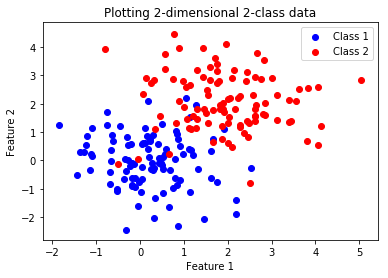

In [13]:
def generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov):
    
    np.random.seed(1)
    class1x = np.random.multivariate_normal(class1Mean, class1Cov, 100)
    class1y = np.zeros(100)
    class2x = np.random.multivariate_normal(class2Mean, class2Cov, 100)
    class2y = np.ones(100)
    x = np.concatenate((class1x, class2x), axis=0)
    y = np.concatenate((class1y, class2y))

    # Plotting the 2-class data
    plt.title('Plotting 2-dimensional 2-class data')
    plt.scatter(class1x[:,0], class1x[:,1], color = 'b', label = 'Class 1')
    plt.scatter(class2x[:,0], class2x[:,1], color = 'r', label = 'Class 2')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()
    
    return x,y

class1Mean = [0, 0]
class1Cov = [[1, 0], [0,1]]

class2Mean = [2, 2]
class2Cov = [[1, 0], [0,1]]

X,y = generate_2d_data(class1Mean, class1Cov, class2Mean, class2Cov)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
def plot(clf, X, y, show_vectors=False):

    cmap = plt.cm.coolwarm
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]

    P = model.decision_function(temp).reshape(yy.shape)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.contour(xx, yy, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xticks(())
    plt.yticks(())
    plt.show()

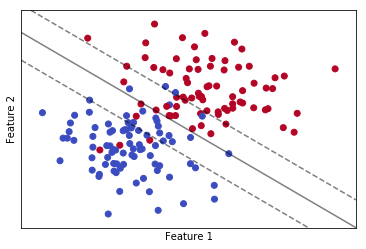

In [15]:
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot(model,X_train,y_train)

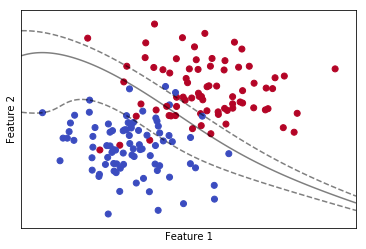

In [16]:
model = SVC(kernel = 'poly', degree=3, C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot(model,X_train,y_train)

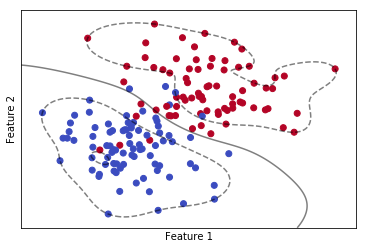

In [17]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
plot(model,X_train,y_train)

### Breast Cancer Prediction

In [18]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target
num_features = X.shape[1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

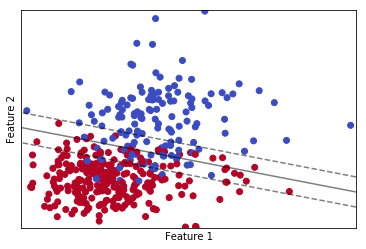

0.8888888888888888


In [19]:
model = SVC(kernel = 'linear', C = 1)
indices = np.array([1,2])
model.fit(X_train[:,indices],y_train)
y_pred = model.predict(X_test[:,indices])
plot(model,X_train[:,indices],y_train)
print(metrics.accuracy_score(y_pred,y_test))

In [20]:
model = SVC(kernel = 'linear', C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9707602339181286


### Digit Prediction

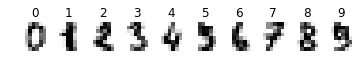

In [21]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [22]:
clf = SVC(kernel='rbf', gamma=0.001)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9851851851851852

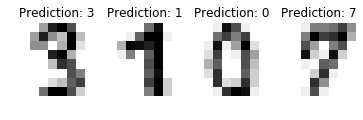

In [23]:
images_and_predictions = list(zip(X_test, y_pred))
for index, (image, prediction) in enumerate(images_and_predictions[5:9]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)